# Bank Marketing

![pexels-yurii-hlei-1398431](pexels-yurii-hlei-1398431.jpg)


## Background
The past few marketing campaigns of a Portuguese banking institution have not gone as well as the firm would have hoped, and they are looking for ways to optimize their marketing efforts.

They have supplied me with data from a previous campaign and some additional metrics in order to understand why the campaigns performed so poorly. Those insight will be use in the next campaign in order to boost the performance.

## **Challenges:**
In this paper we will try to :
- 🗺️ **Cleaning**: Clean and sort the data.
- 🗺️ **Explore**: Understand the jobs of the people who are most likely to subscribe to a term deposit.
- 📊 **Visualize**: Create a plot to visualize the number of people subscribing to a term deposit by `month`.
- 🔎 **Analyze**: analyse impact does the number of contacts performed during the last campaign have on the likelihood that a customer subscribes to a term deposit.

## Data Dictionary

In order to have a more focused analysed on the reasons that led to the failure of the past campaigns we will sort the data set that was fournished.In this analyse we will only focus on the following variables:

| Column | Variable | Class |
| --- | --------------- | --- |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" | 
| previous | number of contacts performed before this campaign and for this client | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

**note that the full data set and its dictionary can be found at :** [Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing) 

**Citations**:  
- S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
- S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. 

## Data cleaning and sorting

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("bank-marketing.csv", delimiter = ";")

In [47]:
data = df[["job", "month","previous", "y"]]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job       41188 non-null  object
 1   month     41188 non-null  object
 2   previous  41188 non-null  int64 
 3   y         41188 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


**Before cleaning, our data set is composed of 4 columns and 41188 rows, it seems to be no missing or inadequate values.**

In [49]:
for col in data.columns:
    print( "\n" + col + "\n", data[col].value_counts())


job
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

month
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

previous
 0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

y
 no     36548
yes     4640
Name: y, dtype: int64


**issues**

- We note that the "job" column have some unknown values.
- We note that the "previous" column with values 5, 6 and 7 are present way to few in our data set to base our analysis on them.

In [50]:
data.loc[data.job == "unknown", "job"] = np.nan
for i in [5,6,7]:
    data.loc[data.previous == i, "job"] = np.nan
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40834 entries, 0 to 41187
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job       40834 non-null  object
 1   month     40834 non-null  object
 2   previous  40834 non-null  int64 
 3   y         40834 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


**After cleaning our data set has 4 columns and 40834 rows with no missing or inadequate values**

## Jobs analysis
in this section we will try to understand the jobs of the people who are most likely to subscribe to a term deposit. And see if the previous campaigns targeted the right people.

In [51]:
data.job.value_counts()

admin.           10413
blue-collar       9254
technician        6738
services          3969
management        2920
retired           1719
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            871
Name: job, dtype: int64

In [52]:
job_dep = data.job[data.y == "yes"].value_counts()
proba = ((job_dep/data.job.value_counts())*100).round(2)
proba

admin.           12.93
blue-collar       6.89
entrepreneur      8.52
housemaid         9.92
management       11.13
retired          25.19
self-employed    10.49
services          8.14
student          31.23
technician       10.80
unemployed       14.20
Name: job, dtype: float64

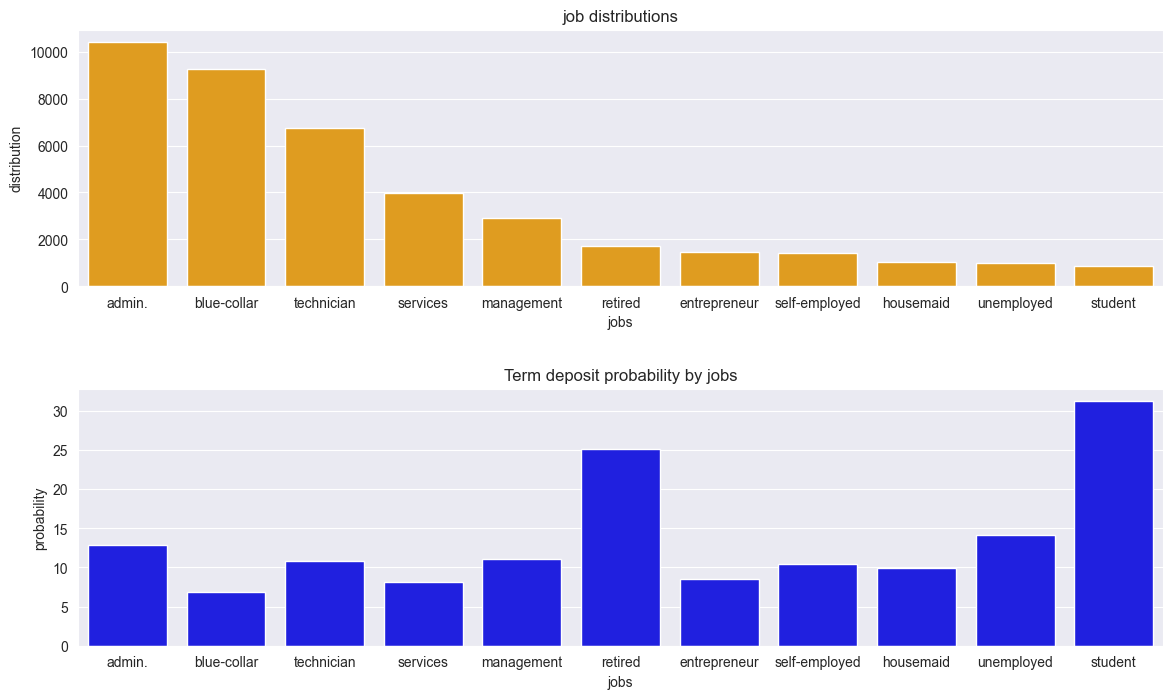

In [53]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(nrows =2, figsize = ((14,8)))
ax0 = sns.countplot(x = "job", data =data, color = "orange", alpha = 1, ax = axs[0], order = data.job.value_counts().index)
ax0.set_title("job distributions")
ax0.set_xlabel("jobs")
ax0.set_ylabel("distribution")
ax1 = sns.barplot(x = proba.index, y = proba.values, color = "blue",ax = axs[1], order = data.job.value_counts().index,)
ax1.set_title("Term deposit probability by jobs")
ax1.set_ylabel("probability")
ax1.set_xlabel("jobs")
plt.subplots_adjust( hspace=0.4)

### Findings

we discovered that the jobs with the highest chances of subscribing to a long term deposit are :

|jobs|probability|distribution's position|
|:---|:----------|-----------------------|
|student|31.23%|11th /11|
|retired|25.19%|6th /11|
|unemployed|14.20%|10th /11|
|admin|12.93%|01st /11|
|management|11.13%|5th /11|

However students were the last category of type of customer that the campaign reached, retired and unemployed were not at the top of the list either.

## Months analysis 
we will analyse how the period(month) of last contact affect the likelihood of people to subscribe to term deposit

[]

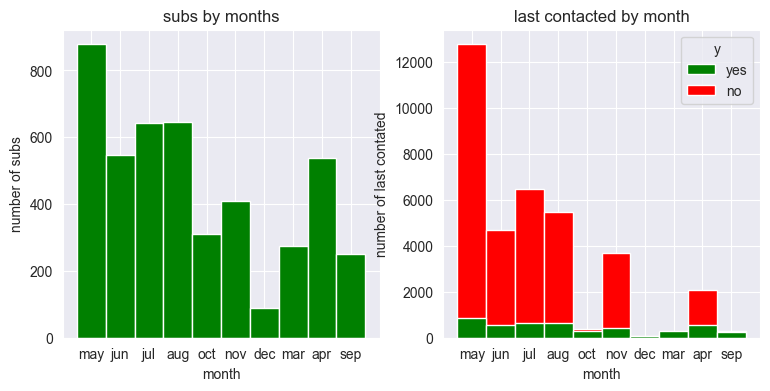

In [54]:
fig, axs = plt.subplots(ncols = 2, figsize = (9,4))
ax = sns.histplot(x = "month", hue = "y", hue_order = ("yes","no"), palette = ("green", "red"),alpha = 1,ax =axs[1], data = data)
ax.set_title("last contacted by month")
ax.set_ylabel("number of last contated")
ax1 = sns.histplot(x = data.month[data.y =="yes"], ax= axs[0], color = "green", alpha =1)
ax1.set_title("subs by months")
ax1.set_ylabel("number of subs")
plt.plot()

### Findings
clients contacted laslty in may were the ones with the  highest number of subscriptions, more than 800 followed by clients last contacted in august and july then june.

## Previous campaign effects analysis

In [55]:
t = data.previous.value_counts()
a= data.previous[df.y == "yes"].value_counts()
b = ((a/t)*100)
(t, a, b)

(0    35270
 1     4536
 2      744
 3      214
 4       70
 Name: previous, dtype: int64,
 0    3119
 1     959
 2     344
 3     127
 4      38
 Name: previous, dtype: int64,
 0     8.843210
 1    21.141975
 2    46.236559
 3    59.345794
 4    54.285714
 Name: previous, dtype: float64)

[]

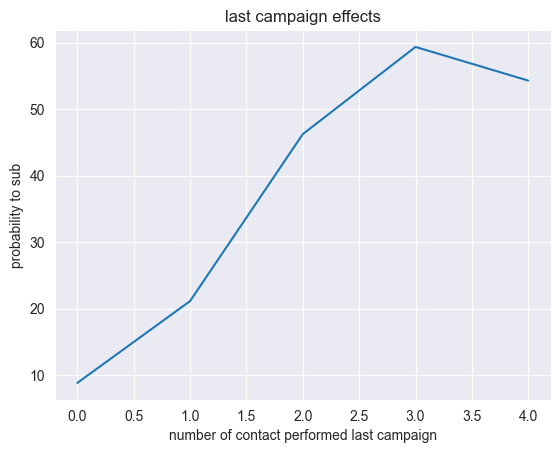

In [56]:
sns.lineplot(x = b.index, y = b.values)
plt.title("last campaign effects")
plt.ylabel("probability to sub")
plt.xlabel("number of contact performed last campaign")
plt.plot()

### Findings
we note that the higher the number of contact performed the previous campaign, the higher is the probability to subscribe. this is the case until we reach 3 numbers of contat. at this point it seems like increasing the number of contacs have a diminishing effect on on the probability to subscribe

## conclusion and recomendations
### 1. Jobs analysis

|jobs|probability|distribution's position|
|:---|:----------|-----------------------|
|student|31.23%|11th /11|
|retired|25.19%|6th /11|
|unemployed|14.20%|10th /11|
|admin|12.93%|01st /11|
|management|11.13%|5th /11|

During our analysis we found that the client types of jobs that were the most targeted were admin, blue collar, and technician, just to mention a few; while the types of jobs with the highest probability to subscribe were at the bottom of the list. This might be one of the reasons why the campaigns performed poorly. Therefore, re-center the campaigns around the public that is more open to subscriptions might help in a future campaign.

### 2. Months analysis

The majority of subscriptions based on when was the last contact revealed that clients contacted lastly in May are the ones that subscribed the more. But that can be explained by the fact that almost double the number of clients were lastly contacted during this period compared to the other ones. To enhance performance, contacting the same number of clients during the other periods might increase performance.
However, there is perhaps a more efficient way to determine the periods that seem more effective than the others. Indeed it seems that August, July, June, and April might be better periods than May since they seem to have a higher probability of positive returns

### 4. Previous campaign effects analysis

During our analysis, we came to the conclusion that the most effective number of contact during the previous campaign was 3, people that were contacted more than 3 times seem more reluctant to subscribe. So targeting the category of people that were contacted 3 times in the previous campaign, for future campaigns might lead to a performance boost.

